# TITLE

In [2]:
import pandas as pd
import numpy as np
import statistics as stats
from  collections import Counter

## Explore Electric Vehicle Data for the State of Washington

In [2]:
electric_vehicle_df = pd.read_csv("./data/Electric_Vehicle_Population_Data.csv")

In [3]:
electric_vehicle_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
#Explore
print('Shape\n', electric_vehicle_df.shape)
print('\n')
print("Duplicates\n", electric_vehicle_df.duplicated().sum())
print('\n')
print('Null\n', electric_vehicle_df.isnull().sum())
print('\n')
print('Describe Numbers\n', electric_vehicle_df.describe())
print('\n')
print('Describe Strings\n', electric_vehicle_df.describe(include='object'))
print('\n')
print('Columns\n', electric_vehicle_df.columns)
print('\n')
print('Correlation\n', electric_vehicle_df.corr())

Shape
 (150482, 17)


Duplicates
 0


Null
 VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                           

C:\Users\riley\AppData\Local\Temp\ipykernel_25264\2966570106.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Correlation\n', electric_vehicle_df.corr())


As we can see there are many 0 values throughout columns such as base MSRP and Electric Range, therefore, we will discard these columns as they are not relevant to our research. Additionally, location information is captured in several locations such as county, postal code, vehicle location, and 2020 Census Tract. We should only consider County from income data set as that is the only way to join the two.

We will begin first by dropping columns that have majority of 0 data and hard to work with location data. Then we will verify that all car data is from Washington.

In [5]:
electric_vehicle_df.drop(columns=["Electric Range", "Base MSRP", "Vehicle Location", "2020 Census Tract"], inplace=True)

In [6]:
print(electric_vehicle_df.loc[electric_vehicle_df['State'] != "WA"].count())

VIN (1-10)                                           341
County                                               338
City                                                 338
State                                                341
Postal Code                                          338
Model Year                                           341
Make                                                 341
Model                                                341
Electric Vehicle Type                                341
Clean Alternative Fuel Vehicle (CAFV) Eligibility    341
Legislative District                                   0
DOL Vehicle ID                                       341
Electric Utility                                     338
dtype: int64


In [7]:
electric_vehicle_df = electric_vehicle_df.loc[electric_vehicle_df['State'] == "WA"]

In [8]:
print(electric_vehicle_df['Legislative District'].isnull().sum())

0


In [9]:
#Get Class Distributions
electric_vehicle_df_length = len(electric_vehicle_df["County"])
for col in electric_vehicle_df:
    count_counter = Counter(electric_vehicle_df[col])
    percent_values=[(i, count_counter[i] / electric_vehicle_df_length) for i in count_counter.most_common()]
    print("Percent class distribution of ", col)
    print(percent_values)
    print('\n')

Percent class distribution of  VIN (1-10)
[(('7SAYGDEE7P', 807), 0.0), (('7SAYGDEE6P', 801), 0.0), (('7SAYGDEE2P', 775), 0.0), (('7SAYGDEE8P', 775), 0.0), (('7SAYGDEEXP', 771), 0.0), (('7SAYGDEE0P', 763), 0.0), (('7SAYGDEE5P', 762), 0.0), (('7SAYGDEE9P', 756), 0.0), (('7SAYGDEE4P', 744), 0.0), (('7SAYGDEE1P', 744), 0.0), (('7SAYGDEE3P', 741), 0.0), (('5YJYGDEE0M', 473), 0.0), (('5YJYGDEE9M', 467), 0.0), (('5YJYGDEE7M', 462), 0.0), (('5YJYGDEE8M', 448), 0.0), (('5YJYGDEE2M', 439), 0.0), (('5YJYGDEE6M', 436), 0.0), (('5YJYGDEEXM', 430), 0.0), (('5YJYGDEE3M', 429), 0.0), (('7SAYGDEEXN', 421), 0.0), (('5YJYGDEE4M', 417), 0.0), (('5YJYGDEE1M', 417), 0.0), (('7SAYGDEE8N', 412), 0.0), (('5YJYGDEE5M', 410), 0.0), (('7SAYGDEE4N', 398), 0.0), (('7SAYGDEE9N', 394), 0.0), (('7SAYGDEE1N', 390), 0.0), (('7SAYGDEE5N', 384), 0.0), (('7SAYGDEE3N', 380), 0.0), (('7SAYGDEE2N', 377), 0.0), (('7SAYGDEE7N', 369), 0.0), (('7SAYGDEE6N', 368), 0.0), (('7SAYGDEE0N', 366), 0.0), (('5YJ3E1EA2P', 347), 0.0), (('5Y

array([[<Axes: title={'center': 'Model Year'}>]], dtype=object)

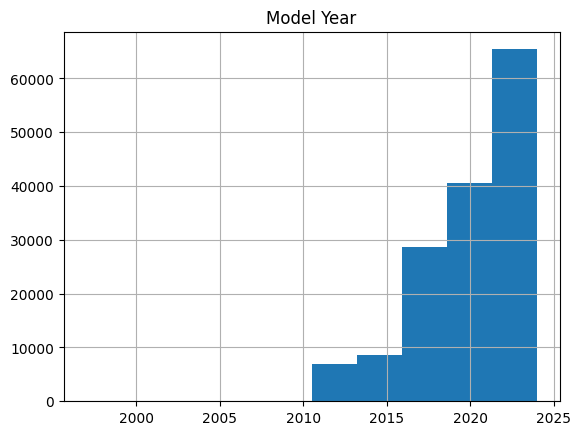

In [10]:
electric_vehicle_df.hist(column="Model Year")

##### TODO FOR VEHICLE DF
Remove Noisy Location Data

Outliers

T Score check

Scaling

## Explore Washington Income Data

In [11]:
income_df = pd.read_csv("./data/median_household_income_estimates.csv",  thousands=',')

In [12]:
income_df.head()

,Unnamed: 0,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Washington,31183.0,33417.0,34379.0,35882.0,36679.0,37895.0,38997.0,40568.0,42399.0,...,57284.0,60153.0,63439.0,65500.0,69288.0,72297.0,78674.0,80319.0,84155.0,86343.0
2,Adams,24604.0,28024.0,27301.0,28328.0,31277.0,29537.0,29604.0,31806.0,31795.0,...,43541.0,45712.0,47646.0,49501.0,48849.0,52870.0,53535.0,56421.0,57405.0,58406.0
3,Asotin,22897.0,24206.0,25110.0,26251.0,27359.0,27873.0,28288.0,29813.0,31499.0,...,42174.0,43368.0,46107.0,47020.0,51767.0,50746.0,54776.0,53377.0,56438.0,59675.0
4,Benton,32593.0,35012.0,37093.0,39228.0,41153.0,42790.0,42540.0,42817.0,44057.0,...,63710.0,63157.0,62071.0,62282.0,63502.0,67912.0,72847.0,75882.0,77339.0,78824.0


In [13]:
#Drop First row of Nan Values
income_df = income_df.iloc[1:]

#Transpose data to view by county and change header
income_df = income_df.T
income_df.columns = income_df.iloc[0]
income_df = income_df[1:]

#Drop Washington as it is the state average and not a county
income_df.drop(columns=["Washington"], inplace=True)

In [14]:

income_df.columns.names = ['Year']

In [15]:
income_df.head()

Year,Adams,Asotin,Benton,Chelan,Clallam,Clark,Columbia,Cowlitz,Douglas,Ferry,...,Skamania,Snohomish,Spokane,Stevens,Thurston,Wahkiakum,Walla Walla,Whatcom,Whitman,Yakima
1989,24604.0,22897.0,32593.0,24312.0,25434.0,31800.0,22418.0,27866.0,27054.0,25170.0,...,28778.0,36847.0,25769.0,24440.0,30976.0,26969.0,24414.0,28367.0,21674.0,23612.0
1990,28024.0,24206.0,35012.0,25833.0,27329.0,33734.0,24478.0,29746.0,28708.0,27355.0,...,31368.0,38820.0,27337.0,25609.0,33139.0,28590.0,25808.0,31097.0,22949.0,25484.0
1991,27301.0,25110.0,37093.0,27592.0,27861.0,34250.0,24123.0,31038.0,29407.0,27236.0,...,31000.0,39868.0,28355.0,26482.0,34851.0,28459.0,26242.0,31953.0,23735.0,25866.0
1992,28328.0,26251.0,39228.0,28746.0,28578.0,35847.0,26136.0,31195.0,30932.0,27841.0,...,31833.0,41670.0,29570.0,27519.0,36676.0,29655.0,27647.0,32599.0,24389.0,27085.0
1993,31277.0,27359.0,41153.0,30148.0,29340.0,37418.0,28123.0,31957.0,31855.0,27829.0,...,32283.0,42418.0,30482.0,28818.0,37766.0,31076.0,28902.0,32958.0,25162.0,28079.0


In [16]:
#Explore
print('Shape\n', income_df.shape)
print('\n')
print("Duplicates\n", income_df.duplicated().sum())
print('\n')
print('Null\n', income_df.isnull().sum())
print('\n')
print('Describe Numbers\n', income_df.describe())
print('\n')
print('Describe Strings\n', income_df.describe(include='object'))
print('\n')
print('Columns\n', income_df.columns)
print('\n')
print('Correlation\n', income_df.corr())

Shape
 (34, 39)


Duplicates
 0


Null
 Year
Adams           0
Asotin          0
Benton          0
Chelan          0
Clallam         0
Clark           0
Columbia        0
Cowlitz         0
Douglas         0
Ferry           0
Franklin        0
Garfield        0
Grant           0
Grays Harbor    0
Island          0
Jefferson       0
King            0
Kitsap          0
Kittitas        0
Klickitat       0
Lewis           0
Lincoln         0
Mason           0
Okanogan        0
Pacific         0
Pend Oreille    0
Pierce          0
San Juan        0
Skagit          0
Skamania        0
Snohomish       0
Spokane         0
Stevens         0
Thurston        0
Wahkiakum       0
Walla Walla     0
Whatcom         0
Whitman         0
Yakima          0
dtype: int64


Describe Numbers
 Year      Adams   Asotin   Benton   Chelan  Clallam    Clark  Columbia  \
count      34.0     34.0     34.0     34.0     34.0     34.0      34.0   
unique     34.0     34.0     34.0     34.0     34.0     34.0      34.0  

C:\Users\riley\AppData\Local\Temp\ipykernel_25264\2936552886.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Correlation\n', income_df.corr())


In [17]:
#Get Class Distributions
income_df_length = len(income_df["Adams"])
for col in income_df:
    count_counter = Counter(income_df[col])
    percent_values=[(i, count_counter[i] / income_df_length) for i in count_counter.most_common()]
    print("Percent class distribution of ", col)
    print(percent_values)
    print('\n')

Percent class distribution of  Adams
[((24604.0, 1), 0.0), ((28024.0, 1), 0.0), ((27301.0, 1), 0.0), ((28328.0, 1), 0.0), ((31277.0, 1), 0.0), ((29537.0, 1), 0.0), ((29604.0, 1), 0.0), ((31806.0, 1), 0.0), ((31795.0, 1), 0.0), ((34073.0, 1), 0.0), ((33888.0, 1), 0.0), ((35292.0, 1), 0.0), ((37839.0, 1), 0.0), ((38306.0, 1), 0.0), ((38934.0, 1), 0.0), ((39235.0, 1), 0.0), ((39105.0, 1), 0.0), ((41298.0, 1), 0.0), ((42299.0, 1), 0.0), ((42455.0, 1), 0.0), ((41102.0, 1), 0.0), ((40656.0, 1), 0.0), ((41068.0, 1), 0.0), ((42354.0, 1), 0.0), ((43541.0, 1), 0.0), ((45712.0, 1), 0.0), ((47646.0, 1), 0.0), ((49501.0, 1), 0.0), ((48849.0, 1), 0.0), ((52870.0, 1), 0.0), ((53535.0, 1), 0.0), ((56421.0, 1), 0.0), ((57405.0, 1), 0.0), ((58406.0, 1), 0.0)]


Percent class distribution of  Asotin
[((22897.0, 1), 0.0), ((24206.0, 1), 0.0), ((25110.0, 1), 0.0), ((26251.0, 1), 0.0), ((27359.0, 1), 0.0), ((27873.0, 1), 0.0), ((28288.0, 1), 0.0), ((29813.0, 1), 0.0), ((31499.0, 1), 0.0), ((32477.0, 1), 0.0

# Charing Stations in Washington

In [20]:
charging_stations_df = pd.read_csv("./data/alt_fuel_stations (Sep 29 2023).csv")

In [21]:
charging_stations_df.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging
0,ELEC,City of Lacey - City Hall Parking,420 College St,"At 3rd Ave SE, next to police station",Lacey,WA,98503,NaN,360-491-3214,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False
1,ELEC,Seattle-Tacoma International Airport - General...,17801 Pacific Hwy S,"5th floor parking garage; rows D, G, and I",Seattle,WA,98188,NaN,206-787-5388,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False
2,ELEC,Avista Corp,1411 E Mission Ave,NaN,Spokane,WA,99252,NaN,509-489-0500,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False
3,ELEC,Steam Plant Parking,130 S Post St,NaN,Spokane,WA,99201,NaN,800-227-9187,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False
4,ELEC,BELLEVUE BELLEVUE CH 1,450 110th Ave NE,NaN,Bellevue,WA,98004,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [22]:
#Explore
print('Shape\n', charging_stations_df.shape)
print('\n')
print("Duplicates\n", charging_stations_df.duplicated().sum())
print('\n')
print('Null\n', charging_stations_df.isnull().sum())
print('\n')
print('Describe Numbers\n', charging_stations_df.describe())
print('\n')
print('Describe Strings\n', charging_stations_df.describe(include='object'))
print('\n')
print('Columns\n', charging_stations_df.columns)
print('\n')
print('Correlation\n', charging_stations_df.corr())

Shape
 (1940, 74)


Duplicates
 0


Null
 Fuel Type Code                                0
Station Name                                  0
Street Address                                0
Intersection Directions                    1854
City                                          0
                                           ... 
NPS Unit Name                              1935
CNG Station Sells Renewable Natural Gas    1940
LNG Station Sells Renewable Natural Gas    1940
Maximum Vehicle Class                      1735
EV Workplace Charging                         0
Length: 74, dtype: int64


Describe Numbers
        Plus4  Expected Date  BD Blends  NG Fill Type Code  NG PSI  \
count    0.0            0.0        0.0                0.0     0.0   
mean     NaN            NaN        NaN                NaN     NaN   
std      NaN            NaN        NaN                NaN     NaN   
min      NaN            NaN        NaN                NaN     NaN   
25%      NaN            NaN        NaN  

C:\Users\riley\AppData\Local\Temp\ipykernel_18300\4054818737.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Correlation\n', charging_stations_df.corr())


In [23]:
charging_stations_df.dropna(axis=1, inplace=True)
charging_stations_df.head()

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Status Code,Groups With Access Code,EV Network,Geocode Status,Latitude,Longitude,ID,Updated At,EV Connector Types,Country,Groups With Access Code (French),Access Code,EV Workplace Charging
0,ELEC,City of Lacey - City Hall Parking,420 College St,Lacey,WA,98503,E,Public,Non-Networked,200-9,47.044011,-122.822404,33351,2023-02-14 15:54:11 UTC,J1772,US,Public,public,False
1,ELEC,Seattle-Tacoma International Airport - General...,17801 Pacific Hwy S,Seattle,WA,98188,E,Public,Non-Networked,200-8,47.443377,-122.296229,33717,2023-08-10 16:58:49 UTC,NEMA520,US,Public,public,False
2,ELEC,Avista Corp,1411 E Mission Ave,Spokane,WA,99252,E,Public,Non-Networked,GPS,47.673347,-117.388933,35620,2023-06-12 16:56:16 UTC,J1772 NEMA520,US,Public,public,False
3,ELEC,Steam Plant Parking,130 S Post St,Spokane,WA,99201,E,Public,Non-Networked,GPS,47.655792,-117.423664,35621,2023-04-06 17:17:01 UTC,J1772,US,Public,public,False
4,ELEC,BELLEVUE BELLEVUE CH 1,450 110th Ave NE,Bellevue,WA,98004,E,Public,ChargePoint Network,GPS,47.614744,-122.193162,37181,2023-09-29 00:18:15 UTC,J1772,US,Public,public,False


In [24]:
#Drop colums:
#fuel type code, status code, groups with access code, state, country, access code because they are all same
#Station Name, Street Address, geocode, latitude, longitude, as we will use city or zip data
#ID, updated at are irrelevant
charging_stations_df.drop(columns=['Fuel Type Code', 'Station Name', 'Street Address', 'State', 'Status Code', 'Groups With Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'ID', 'Updated At', 'Country', 'Groups With Access Code (French)', 'Access Code'], inplace=True)

In [25]:
charging_stations_df

,City,ZIP,EV Network,EV Connector Types,EV Workplace Charging
0,Lacey,98503,Non-Networked,J1772,False
1,Seattle,98188,Non-Networked,NEMA520,False
2,Spokane,99252,Non-Networked,J1772 NEMA520,False
3,Spokane,99201,Non-Networked,J1772,False
4,Bellevue,98004,ChargePoint Network,J1772,False
...,...,...,...,...,...
1935,Tukwila,98188,Blink Network,J1772,False
1936,Lacey,98516,Blink Network,J1772,False
1937,Spokane,99223,EV Connect,J1772COMBO,False
1938,8900 E. Buckeye Ave.,99212,EV Connect,J1772COMBO,False


In [26]:
#Explore
print('Shape\n', charging_stations_df.shape)
print('\n')
print("Duplicates\n", charging_stations_df.duplicated().sum())
print('\n')
print('Null\n', charging_stations_df.isnull().sum())
print('\n')
print('Describe Numbers\n', charging_stations_df.describe())
print('\n')
print('Describe Strings\n', charging_stations_df.describe(include='object'))
print('\n')
print('Columns\n', charging_stations_df.columns)
print('\n')
print('Correlation\n', charging_stations_df.corr())

Shape
 (1940, 5)


Duplicates
 1113


Null
 City                     0
ZIP                      0
EV Network               0
EV Connector Types       0
EV Workplace Charging    0
dtype: int64


Describe Numbers
            City    ZIP           EV Network EV Connector Types  \
count      1940   1940                 1940               1940   
unique      210    303                   16                 13   
top     Seattle  98004  ChargePoint Network              J1772   
freq        467    157                  973               1557   

       EV Workplace Charging  
count                   1940  
unique                     2  
top                    False  
freq                    1933  


Describe Strings
            City    ZIP           EV Network EV Connector Types
count      1940   1940                 1940               1940
unique      210    303                   16                 13
top     Seattle  98004  ChargePoint Network              J1772
freq        467    157        

C:\Users\riley\AppData\Local\Temp\ipykernel_18300\4054818737.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Correlation\n', charging_stations_df.corr())


In [29]:

charging_stations_df_length = len(charging_stations_df["City"])
for row in charging_stations_df:
    count_counter = Counter(charging_stations_df[row])
    percent_values=[(i, count_counter[i] / charging_stations_df_length) for i in count_counter.most_common()]
    print("Percent class distribution of ", row)
    print(percent_values)
    print('\n')

Percent class distribution of  City
[(('Seattle', 467), 0.0), (('Bellevue', 260), 0.0), (('Tacoma', 88), 0.0), (('Spokane', 58), 0.0), (('Vancouver', 45), 0.0), (('Renton', 39), 0.0), (('Olympia', 38), 0.0), (('Bellingham', 34), 0.0), (('Kirkland', 34), 0.0), (('Issaquah', 32), 0.0), (('Redmond', 29), 0.0), (('Bothell', 26), 0.0), (('Everett', 25), 0.0), (('Lynnwood', 24), 0.0), (('Puyallup', 23), 0.0), (('Walla Walla', 21), 0.0), (('Lacey', 20), 0.0), (('Ridgefield', 20), 0.0), (('Yakima', 18), 0.0), (('Tukwila', 17), 0.0), (('Wenatchee', 16), 0.0), (('Auburn', 15), 0.0), (('Anacortes', 14), 0.0), (('Woodinville', 13), 0.0), (('Bremerton', 12), 0.0), (('Leavenworth', 12), 0.0), (('Port Angeles', 11), 0.0), (('SeaTac', 11), 0.0), (('Pullman', 11), 0.0), (('Edmonds', 10), 0.0), (('Kent', 10), 0.0), (('Kennewick', 10), 0.0), (('Aberdeen', 10), 0.0), (('Sammamish', 9), 0.0), (('Burlington', 9), 0.0), (('Federal Way', 9), 0.0), (('Poulsbo', 9), 0.0), (('Liberty Lake', 9), 0.0), (('Mount Ve